In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

/home/anson/.local/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# CUTS:
# |eta(l)| <= 2.5
# pT(l) >= 200
# pT(j1), pT(j2) >= 50

In [5]:
cm = 14
mN1 = 1
s_file = uproot.open(f'../features/signal_reco_{cm}TeV_{mN1}TeV.root')
b_file = uproot.open(f'../features/background_reco_{cm}TeV.root')


In [7]:
df_s = pd.DataFrame(np.array(s_file['t']['features'].array()))
df_b = pd.DataFrame(np.array(b_file['t']['features'].array()))

In [8]:
def plot_reco_truth(df, particle, cm=1, mN1=1):
    plt.figure(figsize=(18, 4))

    range_ = [0,600]
    ax1 = plt.subplot(131)
    ax1.hist(df['pt'+particle], bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Detector Lv.');
    ax1.hist(df['pt'+particle+'True'], bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Generator Lv.');
    er = round((df_s['pt'+particle] - df_s['pt'+particle+'True']).std(),2)
    ax1.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+':\n'+
                  r'$p_T$ of '+particle+'\nError: '+str(er))
    

    range_ = [-5,5]
    ax2 = plt.subplot(132)
    ax2.hist(df['eta'+particle], bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Detector Lv.');
    ax2.hist(df['eta'+particle+'True'], bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Generator Lv.');
    er = round((df_s['eta'+particle] - df_s['eta'+particle+'True']).std(),2)
    ax2.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+':\n'+
                  r'$\eta$ of '+particle+'\nError: '+str(er))

    range_ = [-6,6]
    ax3 = plt.subplot(133)
    ax3.hist(df['phi'+particle], bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Detector Lv.');
    ax3.hist(df['phi'+particle+'True'], bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Generator Lv.');
    er = round((df_s['phi'+particle] - df_s['phi'+particle+'True']).std(),2)
    ax3.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+':\n'+
                  r'$\phi$ of '+particle+'\nError: '+str(er))

    ax1.legend()

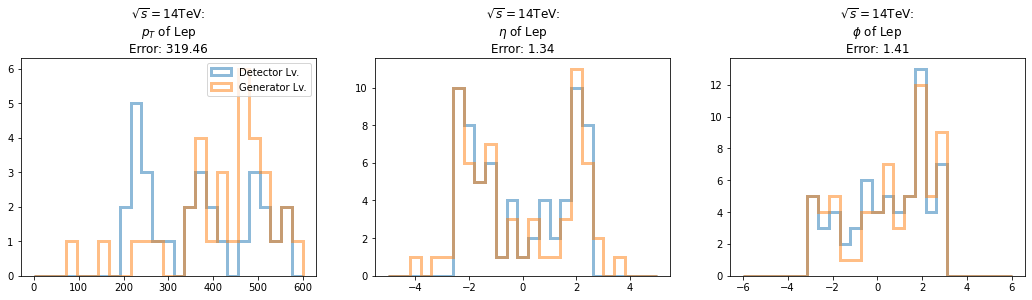

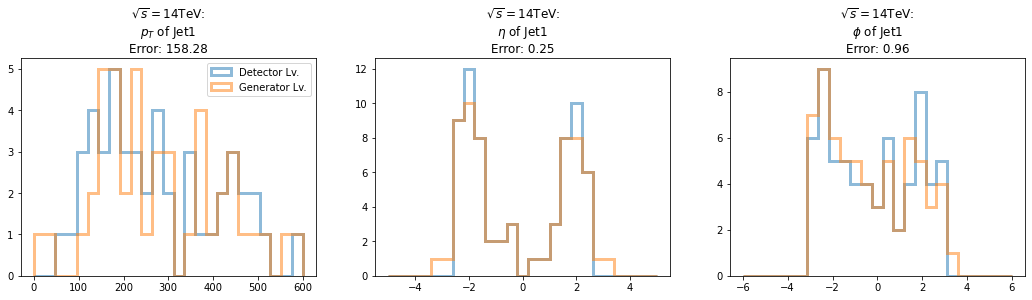

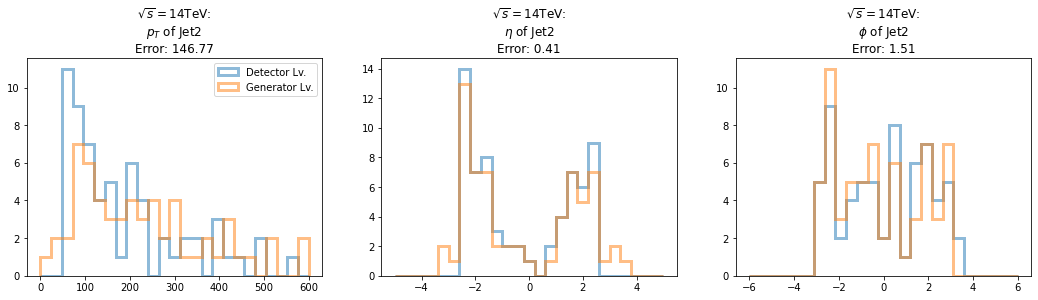

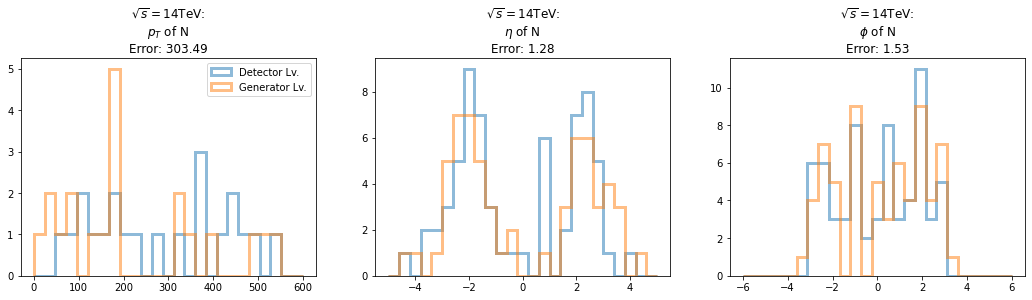

In [9]:
plot_reco_truth(df_s, 'Lep', cm)
plot_reco_truth(df_s, 'Jet1', cm)
plot_reco_truth(df_s, 'Jet2', cm)
plot_reco_truth(df_s, 'N', cm)

In [10]:
def plot_compare(df_s, df_b, particle, cm=1):
    plt.figure(figsize=(18, 4))

    range_ = [0,600]
    ax1 = plt.subplot(131)
    ax1.hist(df_s['pt'+particle], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal');
    ax1.hist(df_b['pt'+particle], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background');
    ax1.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+':\n'+
                  r'$p_T$ of '+particle)

    range_ = [-5,5]
    ax2 = plt.subplot(132)
    ax2.hist(df_s['eta'+particle], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal');
    ax2.hist(df_b['eta'+particle], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background');
    ax2.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+':\n'+
                  r'$\eta$ of '+particle)
    
    range_ = [-6,6]
    ax3 = plt.subplot(133)
    ax3.hist(df_s['phi'+particle], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal');
    ax3.hist(df_b['phi'+particle], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background');
    ax3.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+':\n'+
                  r'$\phi$ of '+particle)
    
    
    ax1.legend() 
    
    

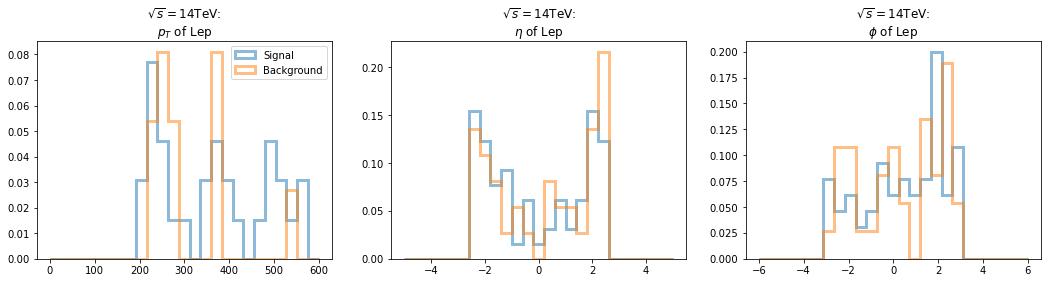

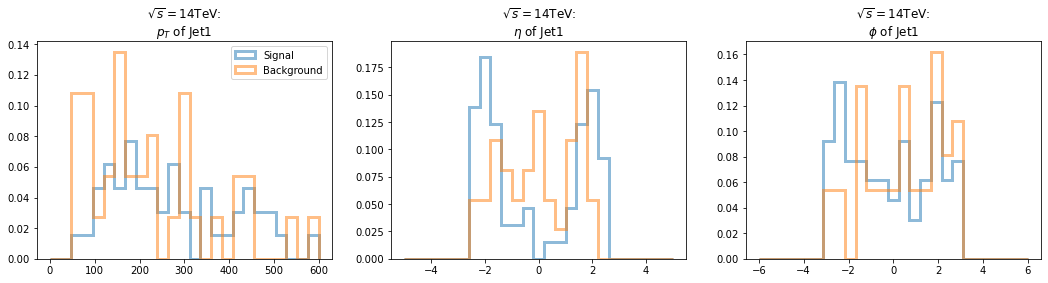

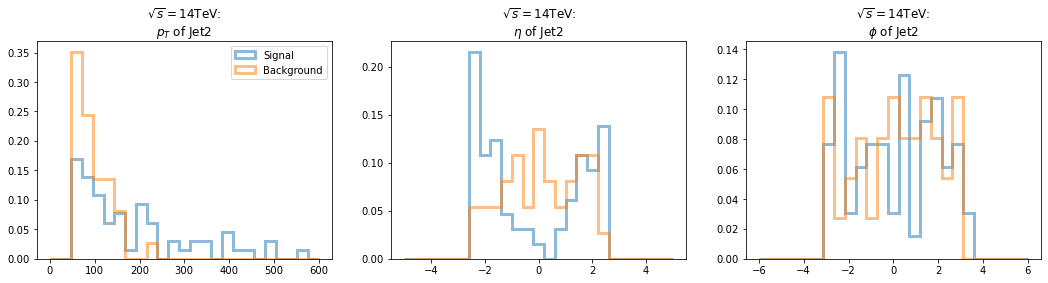

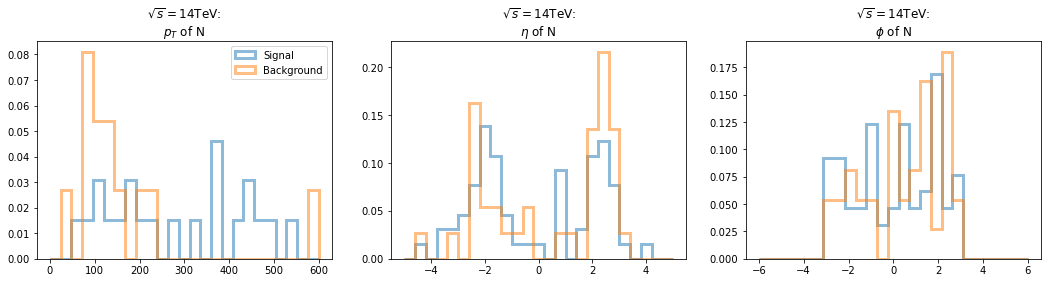

In [11]:
plot_compare(df_s, df_b, 'Lep', cm)
plot_compare(df_s, df_b, 'Jet1', cm)
plot_compare(df_s, df_b, 'Jet2', cm)
plot_compare(df_s, df_b, 'N', cm)

In [12]:
def plot_reco_truth_DeltaR(df_s, cm=1):

    plt.figure(figsize=(18, 4))

    ax1 = plt.subplot(131)
    range_=[0,7]
    ax1.hist(df_s['DeltaRjj'], weights=[1/len(df_s)]*len(df_s), bins=100, range=range_, histtype='step', alpha=0.5, lw=3, label='Detector Lv.');
    ax1.hist(df_s['DeltaRjjTrue'], weights=[1/len(df_s)]*len(df_s), bins=100, range=range_, histtype='step', alpha=0.5, lw=3, label='Generator Lv.');
    er = round((df_s['DeltaRjj'] - df_s['DeltaRjjTrue']).std(),2)
    ax1.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+':\n'+
                  r'$\Delta R(j, j)$'+'\nError: '+str(er))



    ax2 = plt.subplot(132)
    range_=[0,1.2]
    ax2.hist(df_s['DeltaRjj'], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Detector Lv.');
    ax2.hist(df_s['DeltaRjjTrue'], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Generator Lv.');
    er = round((df_s['DeltaRjj'] - df_s['DeltaRjjTrue']).std(),2)
    ax2.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+':\n'+
                  r'Zoomed in $\Delta R(j, j)$'+'\nError: '+str(er))


    ax3 = plt.subplot(133)
    range_=[2,5]
    ax3.hist(df_s['DeltaRjjl'], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Detector Lv.');
    ax3.hist(df_s['DeltaRjjlTrue'], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Generator Lv.');
    er = round((df_s['DeltaRjjl'] - df_s['DeltaRjjlTrue']).std(),2)
    ax3.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+':\n'+
                  r'$\Delta R(jj, \ell)$'+'\nError: '+str(er))


    ax1.legend()

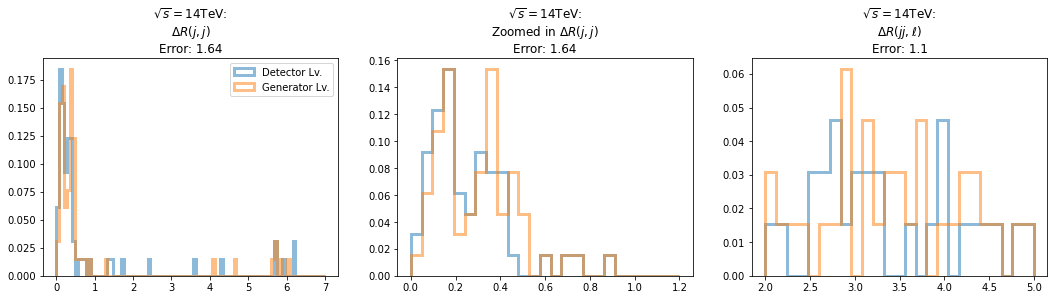

In [13]:
plot_reco_truth_DeltaR(df_s, cm)

In [14]:
def plot_compare_DeltaR(df_s, df_b, cm):

    plt.figure(figsize=(18, 4))

    ax1 = plt.subplot(131)
    range_=[0,7]
    ax1.hist(df_s['DeltaRjj'], weights=[1/len(df_s)]*len(df_s), bins=100, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal');
    ax1.hist(df_b['DeltaRjj'], weights=[1/len(df_b)]*len(df_b), bins=100, range=range_, histtype='step', alpha=0.5, lw=3, label='Background');
    ax1.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+':\n'+
                  r'$\Delta R(j, j)$')



    ax2 = plt.subplot(132)
    range_=[0,1.2]
    ax2.hist(df_s['DeltaRjj'], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal');
    ax2.hist(df_b['DeltaRjj'], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background');
    ax2.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+':\n'+
                  r'Zoomed in $\Delta R(j, j)$')




    ax3 = plt.subplot(133)
    range_=[2,5]
    ax3.hist(df_s['DeltaRjjl'], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Signal');
    ax3.hist(df_b['DeltaRjjl'], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3, label='Background');
    ax3.set_title(r'$\sqrt{s}=$'+str(cm)+'TeV'+':\n'+
                  r'$\Delta R(jj, \ell)$')

    ax1.legend()

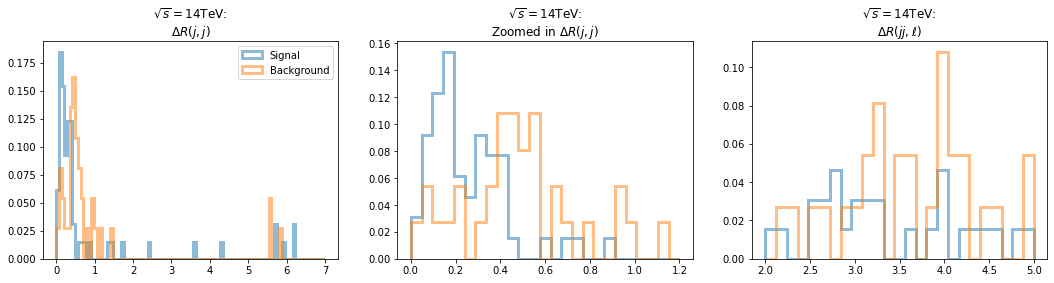

In [15]:
plot_compare_DeltaR(df_s, df_b, cm)

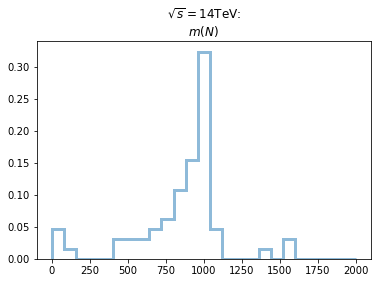

In [16]:
range_ = [0, 2000]
# range_=None
plt.hist(df_s['mN'], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3);
# plt.hist(df_b['mN'], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3);
plt.title(r'$\sqrt{s}=$'+str(cm)+'TeV'+':\n'+
          r'$m(N)$');


In [17]:
len(df_s[(df_s.mN >= 600) & (df_s.mN<=800)])/10000

0.0008

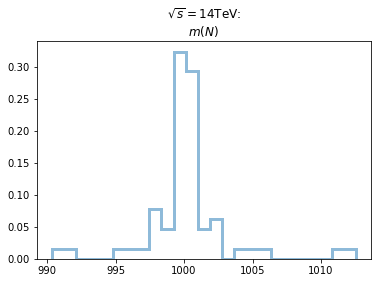

In [18]:
# range_ = [0, 1100]
range_=None
plt.hist(df_s['mNTrue'], weights=[1/len(df_s)]*len(df_s), bins=25, range=range_, histtype='step', alpha=0.5, lw=3);
# plt.hist(df_b['mN'], weights=[1/len(df_b)]*len(df_b), bins=25, range=range_, histtype='step', alpha=0.5, lw=3);
plt.title(r'$\sqrt{s}=$'+str(cm)+'TeV'+':\n'+
          r'$m(N)$');


In [19]:
df_s.columns

Index(['iEvt', 'ptLep', 'etaLep', 'phiLep', 'ptJet1', 'etaJet1', 'phiJet1',
       'ptJet2', 'etaJet2', 'phiJet2', 'DeltaRjj', 'DeltaRjjl', 'mN', 'ptN',
       'etaN', 'phiN', 'ptLepTrue', 'etaLepTrue', 'phiLepTrue', 'ptJet1True',
       'etaJet1True', 'phiJet1True', 'ptJet2True', 'etaJet2True',
       'phiJet2True', 'DeltaRjjTrue', 'DeltaRjjlTrue', 'mNTrue', 'ptNTrue',
       'etaNTrue', 'phiNTrue'],
      dtype='object')